## Baye's Theorem

$$P(H|D) = \frac{{P(D|H)P(H)}}{{P(D)}}$$

Or, in plain English

$${\text{Posterior  =  }}\frac{{{\text{Likelihood}} \times \Pr {\text{ior}}}}{{{\text{Evidence}}}}$$

Bayesian inference has a convergent nature. Priors, regardless of their value, will converge to the same value under identi

## Hidden Markov Model

![title](img/hmm.png)

The Hidden Markov Model (HMM) is useful to relate a noisy state, $y$, to a system's actual state, $x$. This model creates two morphisms taking place after each iteration, ($t+1$).

$${f_k}:{x_k} \to {x_{k + 1}}$$
$${h_k}:{x_k} \to {y_k}$$

The benefit of this approach is that $f_k$ can be based on an ideal model plus process noise. For instance, when measuring constant velocity motion $f_k$ might be $(x+v_{x}\Delta t+ r)$, where r is a random term. In essence, HMM describes noisy processes as a mapping to a hidden ideal model with stochastic diffusion occuring during transformation.

## Recursive Bayesian Estimation


Recursive Bayesian Estimation predicts a state $z_k$ by observing a noisy state $x_k$. Both variables exist in n-dimensional space, such that 

 $${x_k} \in {\mathbb{R}^n}$$

$${z_k} \in {\mathbb{R}^m}$$

A Bayesian posterior occuring to this Markovian process would be a cumulative of the system model conditioned by a previous posterior

$$p({x_k}|{z_{1:k}}) = \int {p({x_k}|{x_{k - 1}})p({x_{k - 1}}|{z_{1:k - 1}})d{x_{k - 1}}} $$

Where $p({x_k}|{x_{k - 1}})$ is the system model and $p({x_{k - 1}}|{z_{1:k - 1}})d{x_{k - 1}}$ is the previous posterior. 

### Example: Filtering Noisy Measurements of an X,Y Coordinate

<IPython.core.display.Javascript object>


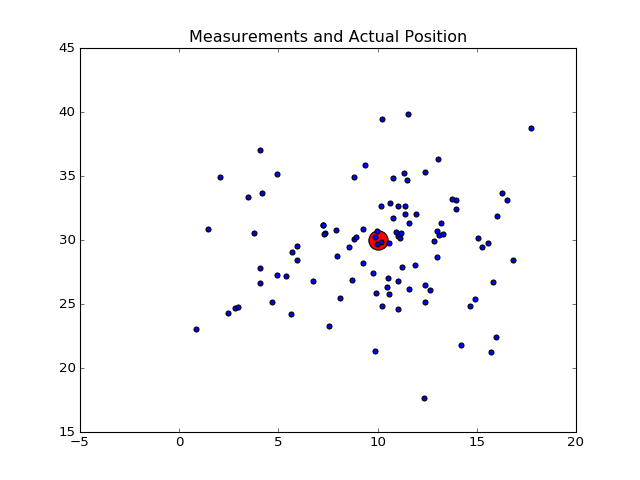

In [32]:
##Setup to run Recursive Baye's Estimator
##A bunch of measurements (data_x, data_y) were taken
##An actual position is also given (3,5)
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


##GLOBALS
x_coor, y_coor = 10, 30
N=100
mu, sigma = 3, 4 

s = np.array([x_coor,y_coor])

data_x = np.random.normal( x_coor , sigma, N)
data_y = np.random.normal( y_coor, sigma, N)
x = np.zeros((2, N))

plt.scatter(s[0], s[1], s=300.0, c='r')
plt.scatter(data_x, data_y)

plt.title("Measurements and Actual Position")
plt.show()


In [33]:
##Setup Sample Space and Posterior, Prior
space_x = np.arange(x_coor-1, x_coor+1, .05) ##Where the actual position is likely to be
space_y = np.arange(y_coor-1, y_coor+1, .05)
length = len(space_x)
posterior = np.full((length, length), 1.0, dtype=np.float)
prior = posterior

##Normalize
posterior /= np.sum(posterior)
prior /= np.sum(prior)

##Plot Posterior. Boring...for now
X,Y = np.meshgrid(space_x,space_y )
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, prior)
plt.title("Posterior Before Iterations")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


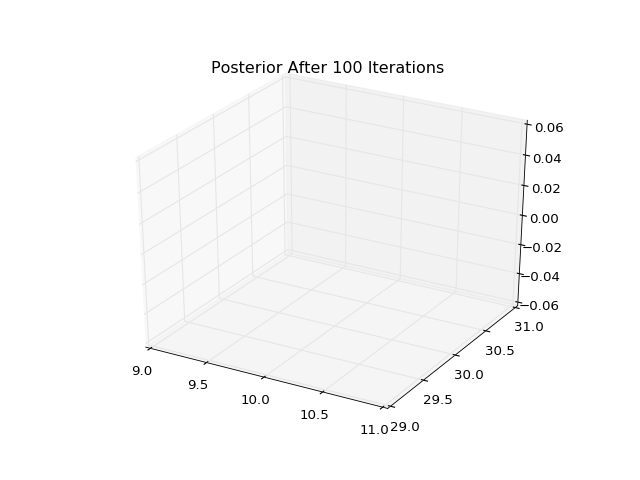

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


In [30]:
##Add covariance matrix and x data
Cov = np.array([[4,0],[0,4]])
x = np.row_stack((data_x, data_y))
fig = plt.figure()
ax = fig.gca(projection='3d')

##Recursively Update Posterior
for n in range(2, N):
    prior = posterior
    m = 0*prior
    for i in range(1, len(prior)):
        for j in range(1, len(prior)):
            me = np.array([space_x[i], space_y[j]])
            ##Computes a*exp(-X^2/2)
            a = (1/np.sqrt((2*np.pi)**2)*np.linalg.det(Cov))
            c = np.array([x[0][n],x[1][n]])
            tra = np.matmul(np.transpose((c-me)),np.linalg.inv(Cov))
            top = np.matmul(tra,(c-me)/2)
            m[i][j] = a*np.exp(-top)
            m[i][j] = m[i][j]*prior[i][j]            
    posterior = m/np.sum(np.sum(m))
    
##Plot Posterior
X,Y = np.meshgrid(space_x,space_y )
ax.plot_surface(X, Y, posterior, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)
plt.title("Posterior After %s Iterations" % N)
plt.show()

In [31]:
##Determine accuracy
from IPython.display import display, Markdown, Latex

x,y = np.unravel_index(posterior.argmax(), posterior.shape)
x_est = space_x[x]
y_est = space_y[y]

x_err = (s[0]-x_est)/s[0]
y_err = (s[1]-y_est)/s[1]

ind = '&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'
display(Markdown('### Bayesian Estimation Results'))
display(Markdown('#### Coordinates'))
display(Markdown(ind+"$x_{act}$: **%s**, $y_{act}$: **%s**" % (s[0],s[1])))
display(Markdown(ind+"$x_{est}$: **%s**, $y_{est}$: **%s**" %(x_est, y_est)))
display(Markdown("#### Error"))
display(Markdown(ind+"$x$-coordinate error: **%s%%**" % (round(abs(100*x_err),2))))
display(Markdown(ind+"$y$-coordinate error: **%s%%**" % (round(abs(100*y_err),2))))

### Bayesian Estimation Results

#### Coordinates

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_{act}$: **10**, $y_{act}$: **30**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_{est}$: **9.0**, $y_{est}$: **29.0**

#### Error

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x$-coordinate error: **10.0%**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y$-coordinate error: **3.33%**